In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load dataset

In [195]:
df = pd.read_csv("../datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [196]:
df.shape

(7043, 21)

### Exploratory Data Analysis

#### Drop unnecessary columns like customerID

In [197]:
df = df.drop('customerID' , axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Check out datatypes of columns and change if necessary

In [198]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observe that total charges column is type object

In [199]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

##### Find rows where TotalCharges values are " " and drop them

In [200]:
df[pd.to_numeric(df.TotalCharges , errors = 'coerce').isnull()].shape

(11, 20)

11 such rows are present compared to 7043 rows which is quite few they can be dropped

In [201]:
df1 = df[df.TotalCharges != ' ']

In [202]:
df1.shape

(7032, 20)

##### Convert TotalCharges to float

In [203]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ateet\AppData\Local\Temp\ipykernel_37344\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


#### Data Visualization

##### Explore tenure column with churn

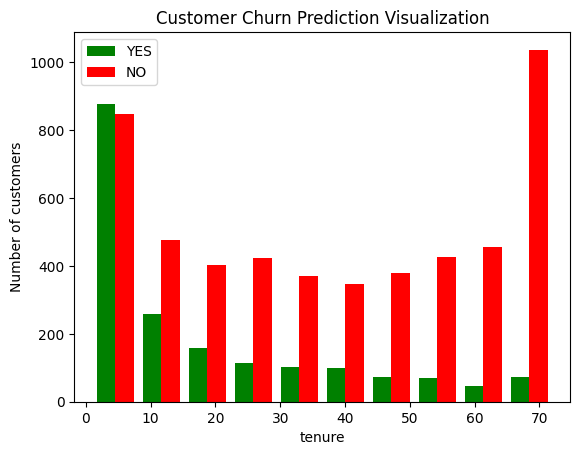

In [204]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes  , tenure_churn_no] , color = ['green' , 'red'] , label = ['YES' , 'NO'])

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

<AxesSubplot: xlabel='tenure', ylabel='Count'>

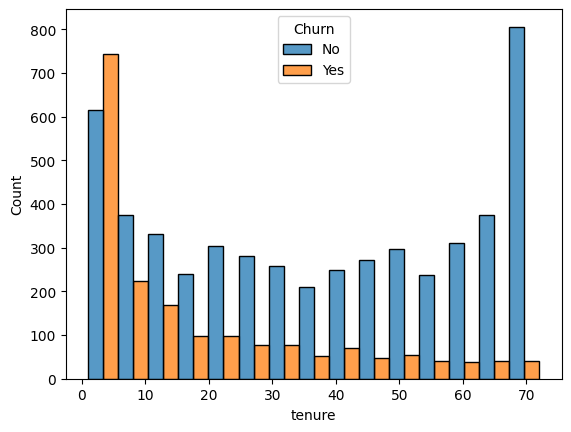

In [205]:
import seaborn as sns
sns.histplot(data = df1 , x = 'tenure', hue = 'Churn' ,  multiple="dodge")

It can be observed that customers who are with the company for long time have less chance of leaving i.e churn = No

##### Explore Monthly charges column with churn

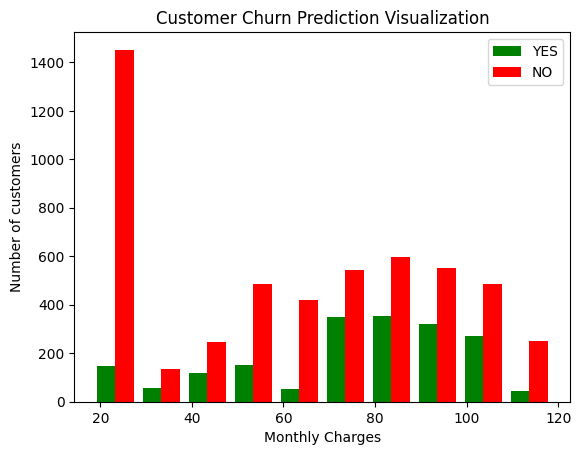

In [206]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_yes  , mc_churn_no] , color = ['green' , 'red'] , label = ['YES' , 'NO'])

plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Count'>

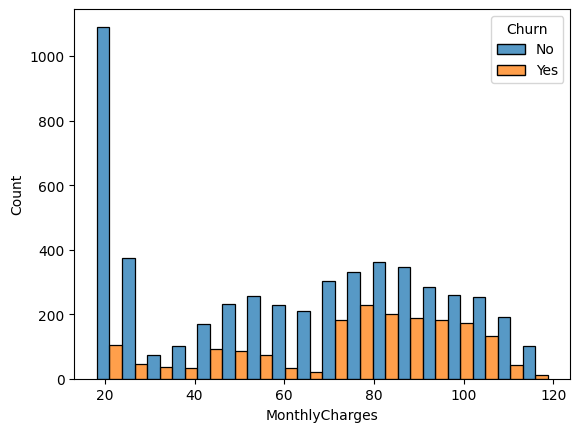

In [207]:
import seaborn as sns
sns.histplot(data = df1 , x = 'MonthlyCharges', hue = 'Churn' ,  multiple="dodge")

#### Label Encoding of categorical columns

##### Check unique values in columns which are of object type

In [208]:
def print_unique_col_values(df) :
  for column in df :
    if df[column].dtypes == 'object' : 
      print(f'{column} : {df[column].unique()}')

In [209]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Values like No internet service / No phone service replace with No

In [210]:
df1 = df1.replace('No internet service' , 'No')
df1 = df1.replace('No phone service' , 'No')

print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Replace Yes , No with 1 , 0 . Also replace Female , Male 1 , 0

In [211]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' , 'Churn']

for col in yes_no_columns : 
  df1[col] = df1[col].replace({'Yes' : 1 , 'No' : 0})
  
df1['gender'] = df1['gender'].replace({'Female' : 1 , 'Male' : 0})

In [212]:
for column in df1 : 
  print(f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


#### One hot encoding of categorical columns also drop first category to avoid dummy variable trap

In [213]:
df2 = pd.get_dummies(data = df1 , columns = ['InternetService' , 'Contract' , 'PaymentMethod'] , drop_first = True)

df2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

Now all columns are either integer or float, no more categorical columns

### Perform scaling of columns and try and make them in range 0 to 1 to improve model

In [214]:
cols_to_scale = ['tenure' , 'MonthlyCharges' , 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


### Split dependent and independent features and split the data into test and train

In [215]:
X = df2.drop('Churn' , axis = 1)
y = df2['Churn']

In [216]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 5)

In [217]:
X_train.shape

(5625, 23)

In [218]:
X_test.shape

(1407, 23)

### Creating ANN

#### BUILD MODEL 1

In [230]:
from tensorflow import keras

import tensorflow

from keras.wrappers.scikit_learn import KerasClassifier

#from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense , Activation , Embedding , Flatten , LeakyReLU , BatchNormalization , Dropout
from keras.activations import relu , sigmoid

In [220]:
def create_model(layers , activation) :
  model = Sequential()
  for i , nodes in enumerate(layers) :
    # Add number of required neurons which will be mentioned in the layers parameter
    # Apply the activation function that is specified as parameter
    # Add dropout layer
    
    # If first layer
    if i == 0 :
      # input dimensions is number of input features that is obtained from X_train.shape[1]
      model.add(Dense(units = nodes , input_dim = X_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
      
    else :
      model.add(Dense(units = nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
      
  # As binary classification problem add sigmoid activation for final layer and use glorot_uniform to initialize weights for final layer which works well with sigmoid
  
  # In last layer as 1 output initialize units = 1
  model.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid'))
  
  # Use adam optimizer and since binary classification use binary_crossentropy as loss function
  model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
  
  return model 

In [221]:
# model = KerasClassifier(build_fn = create_model , verbose = 0)

# Build function is function we use to create model i.e create_model this case
model = KerasClassifier(build_fn = create_model , verbose = 0)

C:\Users\ateet\AppData\Local\Temp\ipykernel_37344\3454996028.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model , verbose = 0)


In [222]:
# Combinations to test the model with i.e diff number of layers and diff activation function
layers = [[20] , [40 , 20] , [45 , 30 , 15]]
activations = ['sigmoid' , 'relu']

In [223]:
param_grid = dict(layers = layers , activation = activations , batch_size = [128 , 256] , epochs = [30])

model = GridSearchCV(estimator = model , param_grid = param_grid , cv = 5)

In [224]:
grid_result = model.fit(X_train , y_train)

In [225]:
print(grid_result.best_score_ , grid_result.best_params_)

0.8060444355010986 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [45, 30, 15]}


In [226]:
yp = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [227]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [228]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

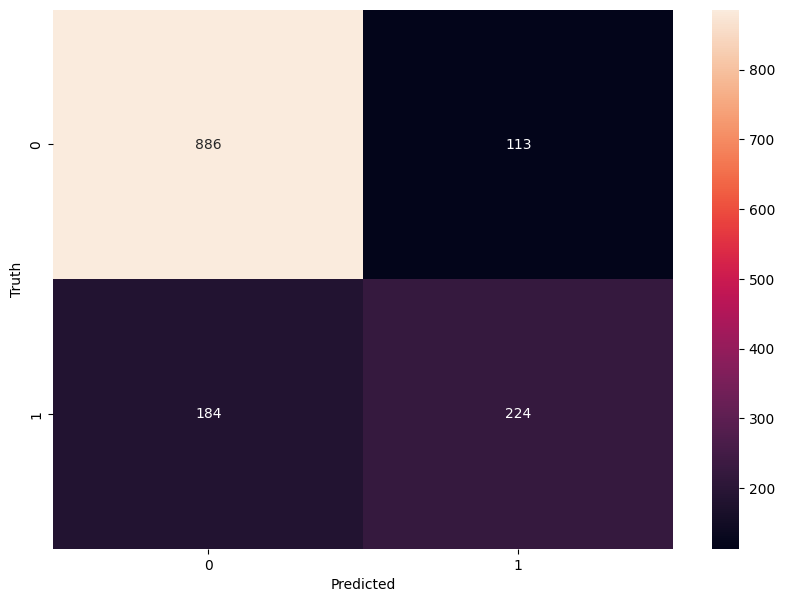

In [231]:
import seaborn as sn
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### BUILD MODEL 2

In [232]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(23,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.4794 - accuracy: 0.7703
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4227 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8030
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4108 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8039
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4080 - accuracy: 0.8082
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4078 - accura

In [234]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 5ms/step - loss: 0.4790 - accuracy: 0.7740


[0.47897136211395264, 0.7739872336387634]

In [233]:
yp = model.predict(X_test)

44/44 [==============================] - 0s 4ms/step


In [235]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [236]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.56      0.59       408

    accuracy                           0.77      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

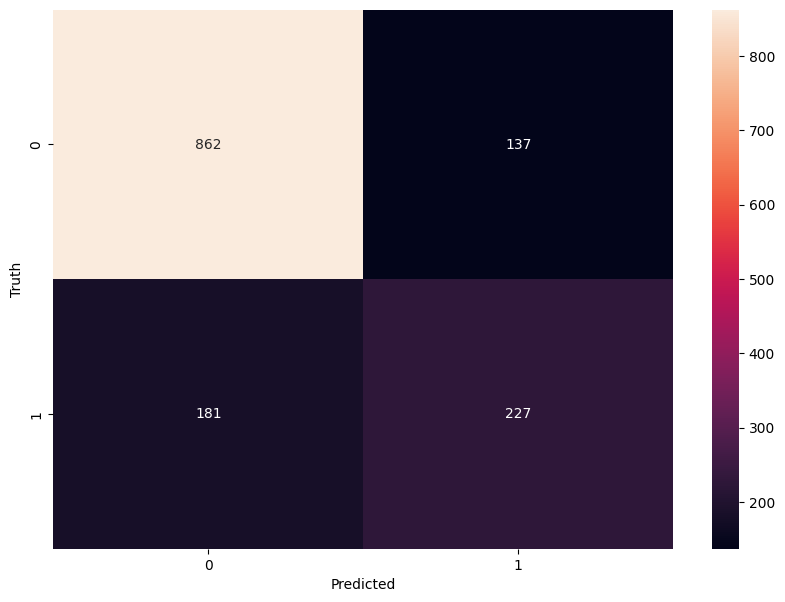

In [237]:
import seaborn as sn
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')